## Laboratorium 4 - algorytm Najbliższej Średniej (NM)


### Opis
Celem laboratorium jest implementacja klasyfikatora najbliższej średniej NM (*Nearest Mean*).


### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Euklidesa**.
* Zaimplementuj funkcję, która zwraca macierz kowariancji (*uwaga: biblioteka `numpy` posiada gotową implementację `cov` z którą możesz porównać wynik*).

    \begin{equation*}
    C = \frac{1}{n - 1} (X - \bar X)(X - \bar X)^T
    \end{equation*}

    gdzie:
    * $X$ to macierz, 
    * $\bar X$ to wektor ze średnimi wartościami cech. 

* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Machalanobisa**.

    \begin{equation*}
    D_j = \sqrt{ (x - \mu_j)^T S_j^{-1}(x - \mu_j) },
    \end{equation*}

    gdzie:
    * $D_j$ to odległość klasyfikowanej próbki do $j$-tej klasy (grupy, klastra), 
    * $\mu_j$ to wektor ze średnimi wartościami cech w obrębie $j$-tej klasy, 
    * $S_j^{-1}$ to odwrócona macierz kowariancji $j$-tej klasy, 
    * a $x$ to klasyfikowana próbka.

* Opisz wyniki klasyfikatorów i porównaj je z klasyfikatorem *k*NN (porównaj w kontekście różnych metryk - obowiązkowo tablica pomyłek).

> Podpowiedź 1: Do obliczenia macierzy odwrotnej możesz użyć gotową implementację, np. funkcję `linalg.inv` z biblioteki `numpy`.

> Podpowiedź 2: Do wszelkich podstawowych operacji na macierzach (mnożenie, transpozycja, dodawanie, odejmowanie, itp.) możesz zastosować gotową implementację, np. bibliotekę `numpy`.

> UWAGA 1: W niniejszym zadaniu jest dowolność implementacji (nie trzeba trzymać się struktury z poprzedniego zadania), jednak algorytm NM należy zaimplementować samodzielnie bez korzystania z istniających rozwiązań (jak np. z biblioteki `scikit-learn`).

> UWAGA 2: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.


**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```


<span style="text-decoration:underline">Referencje</span>

1. Mahalanobis, P C, _On test and measures of group divergence : theoretical formulae_, Journal and Proceedings of Asiatic Society of Bengal (New Series) Vol. 26, pp. 541-588. 1930. (URL: http://library.isical.ac.in:8080/xmlui/bitstream/handle/10263/1639/029.pdf)
2. McLachlan, Goeffrey J. _Mahalanobis distance_, Resonance, pp. 20-26. 1999. (URL: https://www.ias.ac.in/article/fulltext/reso/004/06/0020-0026)

In [1287]:
# <UZUPEŁNIJ>
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

all_data = pd.DataFrame(np.vstack((train, test)))
all_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,36.0,1.0,0.39093,1.1025,0.73351,0.72022,0.69474,0.17954,0.076072,1.053200,0.059213,0.157470,0.024197,0.009541,0.000247,1.20420
1,5.0,4.0,0.93671,2.4151,0.72980,0.81793,0.86491,0.33439,0.080539,1.180500,0.048722,0.120510,0.014314,0.003998,0.000372,1.30830
2,29.0,1.0,0.83750,1.9512,0.49050,0.96800,0.98246,0.65138,0.016224,0.047908,0.005119,0.035621,0.001267,0.000322,0.000011,0.23514
3,35.0,3.0,0.90755,2.5820,0.62394,0.96837,0.99825,0.55674,0.031714,0.183050,0.079387,0.162130,0.025613,0.007412,0.000699,1.69510
4,32.0,7.0,0.88485,2.2398,0.55754,0.97997,0.99825,0.67974,0.009129,0.015166,0.025658,0.087206,0.007548,0.002152,0.000179,0.75154


In [1288]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if feature_name != 0:
            if df[feature_name].dtype == 'float64' or df[feature_name].dtype == 'int32':
                max_value = df[feature_name].max()
                min_value = df[feature_name].min()
                result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


train = normalize(pd.DataFrame(train))
test = normalize(pd.DataFrame(test))

columns = ["class"]
for i in range(1, 16):
    columns.append('feature_' +str (i))

train.columns = columns
test.columns = columns

all_data.columns = columns

# train = pd.DataFrame(train)
# test = pd.DataFrame(test)
train.head()

,class,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,36.0,0.000000,0.325831,0.024266,0.703508,0.454962,0.495454,0.186267,0.385109,0.153731,0.305450,0.512751,0.332917,0.379755,0.097674,0.422129
1,5.0,0.230769,0.842476,0.095004,0.699710,0.587664,0.687900,0.356208,0.407041,0.171017,0.252791,0.379455,0.204207,0.172717,0.138704,0.459842
2,29.0,0.000000,0.748562,0.070003,0.454741,0.791479,0.820838,0.704091,0.091261,0.017223,0.033927,0.073304,0.034294,0.035405,0.020092,0.071054
3,35.0,0.153846,0.814872,0.103998,0.591342,0.791981,0.838695,0.600227,0.167316,0.035574,0.406714,0.529557,0.351359,0.300249,0.246043,0.599974
4,32.0,0.461538,0.793384,0.085556,0.523369,0.807735,0.838695,0.735215,0.056424,0.012777,0.137020,0.259345,0.116085,0.103741,0.075136,0.258137


In [1289]:
max_k = 3

klasy = train['class'].unique()
klasy = np.sort(klasy)
print(np.sort(klasy[:4]))

cechy = columns
if 'class' in cechy:
    cechy .remove('class')
print(cechy)

[1. 2. 3. 4.]
['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15']


In [1290]:
class_split = []

for klasa in klasy:
    class_split.append(train[train['class'] == klasa])

for c in class_split:
    c.reset_index()

In [1291]:
mis = []

for c in class_split:
    mis.append(c.drop(columns=['class']).mean())

In [1292]:
mis[0]

feature_1     0.417582
feature_2     0.717636
feature_3     0.056664
feature_4     0.388558
feature_5     0.799007
feature_6     0.833779
feature_7     0.838512
feature_8     0.040078
feature_9     0.011244
feature_10    0.110528
feature_11    0.202853
feature_12    0.097982
feature_13    0.093144
feature_14    0.050155
feature_15    0.197198
dtype: float64

In [1293]:
def covariation_matrix(x: np.array):

    mean = x.mean().to_numpy()
    x = x.to_numpy()
    n = x.shape[0]

    mo = x - mean

    summer = mo.T @ mo

    summer /= (n - 1)

    return summer

In [1294]:
cov1 = np.cov(class_split[0].drop(columns=['class']).T)

In [1295]:
cov2 = covariation_matrix(class_split[0].drop(columns=['class']))

In [1296]:
(cov1.round(3) == cov2.round(3))

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  T

In [1297]:
def edist(p1, mi, features):
    # print(mi)
    ans = 0
    for idx, feature in enumerate(features):
        # print(p1[feature], p2[feature])
        ans += ((p1[feature] - mi[feature]) ** 2)
    ans = ans ** (1/2)
    return ans

In [1298]:
def predict(mi_list, df_test, features_list):
    predictions = []
    for i in df_test.index:
        points = []
        for idx, j in enumerate(mi_list, start=1):
            test_row = df_test.iloc[i]
            current = (edist(test_row, j[0], features_list), j[1])
            # print(test_row)
            # print(train_row)
            # # print(current)
            points.append(current)
        points = sorted(points, key=lambda x: x[0])
        predictions.append(points[0][1])
    return np.array(predictions)

In [1299]:
def plot2d(train_df, class1, class2, feature1, feature2, test_df=None, miss=None):

    plt.figure(figsize=(10, 10))

    t1 = train_df[train_df['class'] == class1]
    t2 = train_df[train_df['class'] == class2]

    plt.scatter(t1[feature1], t1[feature2], c='blue', label='Training class ' + str(class1))
    plt.scatter(t2[feature1], t2[feature2], c='orange', label='Training class  ' + str(class2))

    if test_df is not None:
        p1 = test_df[test_df['observed'] == class1]
        p2 = test_df[test_df['observed'] == class2]

        plt.scatter(p1[feature1], p1[feature2], c='blue', marker='x', label='Test class ' + str(class1))
        plt.scatter(p2[feature1], p2[feature2], c='orange', marker='x', label='Test class ' + str(class2))

    if miss is not None:
        m1 = miss[0][0]
        m2 = miss[1][0]


        plt.scatter(m1[feature1], m1[feature2], s=1000, c='red', marker='+', label='Mi of class ' + str(class1))
        plt.scatter(m2[feature1], m2[feature2], s=1000, c='yellow', marker='+', label='Mi of class ' + str(class2))

    plt.legend()

In [1300]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score

def show_statistics(true, pred, classes):
    cm = confusion_matrix(true, pred)
    cmd = ConfusionMatrixDisplay(cm, display_labels=[int(xxx) for xxx in classes])
    cmd.plot(cmap='binary')
    print('Accuracy:', accuracy_score(true, pred))
    bac = balanced_accuracy_score(true, pred)
    print('Balanced accuracy:', bac)
    f1s = f1_score(true, pred, average='micro')
    print('F1 score:', f1s)

    return bac, f1s

In [1301]:
def evaluate_model(classes, features, k):
    wybrane_klasy = classes
    wybrane_cechy = features

    train_filtered = train[train['class'].isin(wybrane_klasy)]
    test_filtered = test[test['class'].isin(wybrane_klasy)]
    mis_filtered = []

    for kk in wybrane_klasy:
        mis_filtered.append((train[train['class'] == kk].mean(), kk))

    train_filtered = train_filtered.reset_index()
    test_filtered = test_filtered.reset_index()

    prediction = predict(mis_filtered, test_filtered, wybrane_cechy)

    predicted_test = test_filtered
    predicted_test['observed'] = prediction

    if len(classes) == 2 and len(features) == 2:
        plot2d(train_filtered, classes[0], classes[1], features[0], features[1], predicted_test, mis_filtered)

    return show_statistics(predicted_test['class'], predicted_test['observed'], wybrane_klasy)

Accuracy: 1.0
Balanced accuracy: 1.0
F1 score: 1.0


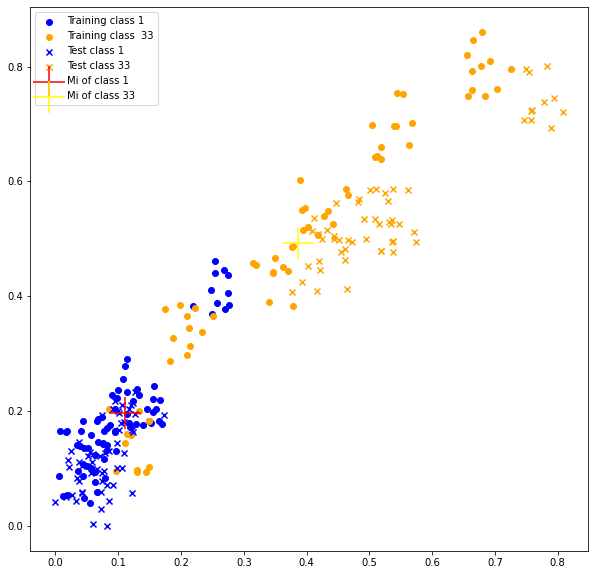

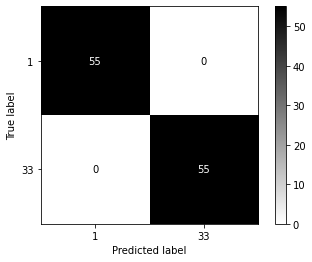

In [1302]:
klasy_w = [1, 33]
featury = [10, 15]
featury = ['feature_' + str(x) for x in featury]
k = i

bas, f1s = evaluate_model(klasy_w, featury, k)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury)) + ', k =' + str(k)

In [ ]:

klasy_w = klasy
featury = cechy[:2]
# featury = ['feature_' + str(x) for x in featury]

bas, f1s = evaluate_model(klasy_w, featury, 1)
name = 'Classes = ' + str(len(klasy_w)) + ', Features = ' + str(len(featury))
